In [ ]:
import pymc as pm
import arviz as az
print(pm.__version__)

5.26.1


In [ ]:
!pip install pymc arviz patsy matplotlib numpy pandas

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Datos1 - Interpolados.csv to Datos1 - Interpolados.csv


In [ ]:
import pandas as pd

data = pd.read_csv("Datos1 - Interpolados.csv")
print(data.head())

   anio  precipitacion  produccion_agricola  energiapercapita
0  2005          15.50               527000              1.21
1  2006          14.32               531000              1.17
2  2007          17.30               535000              1.13
3  2008          64.00               539000              1.26
4  2009          18.26               543000              1.30


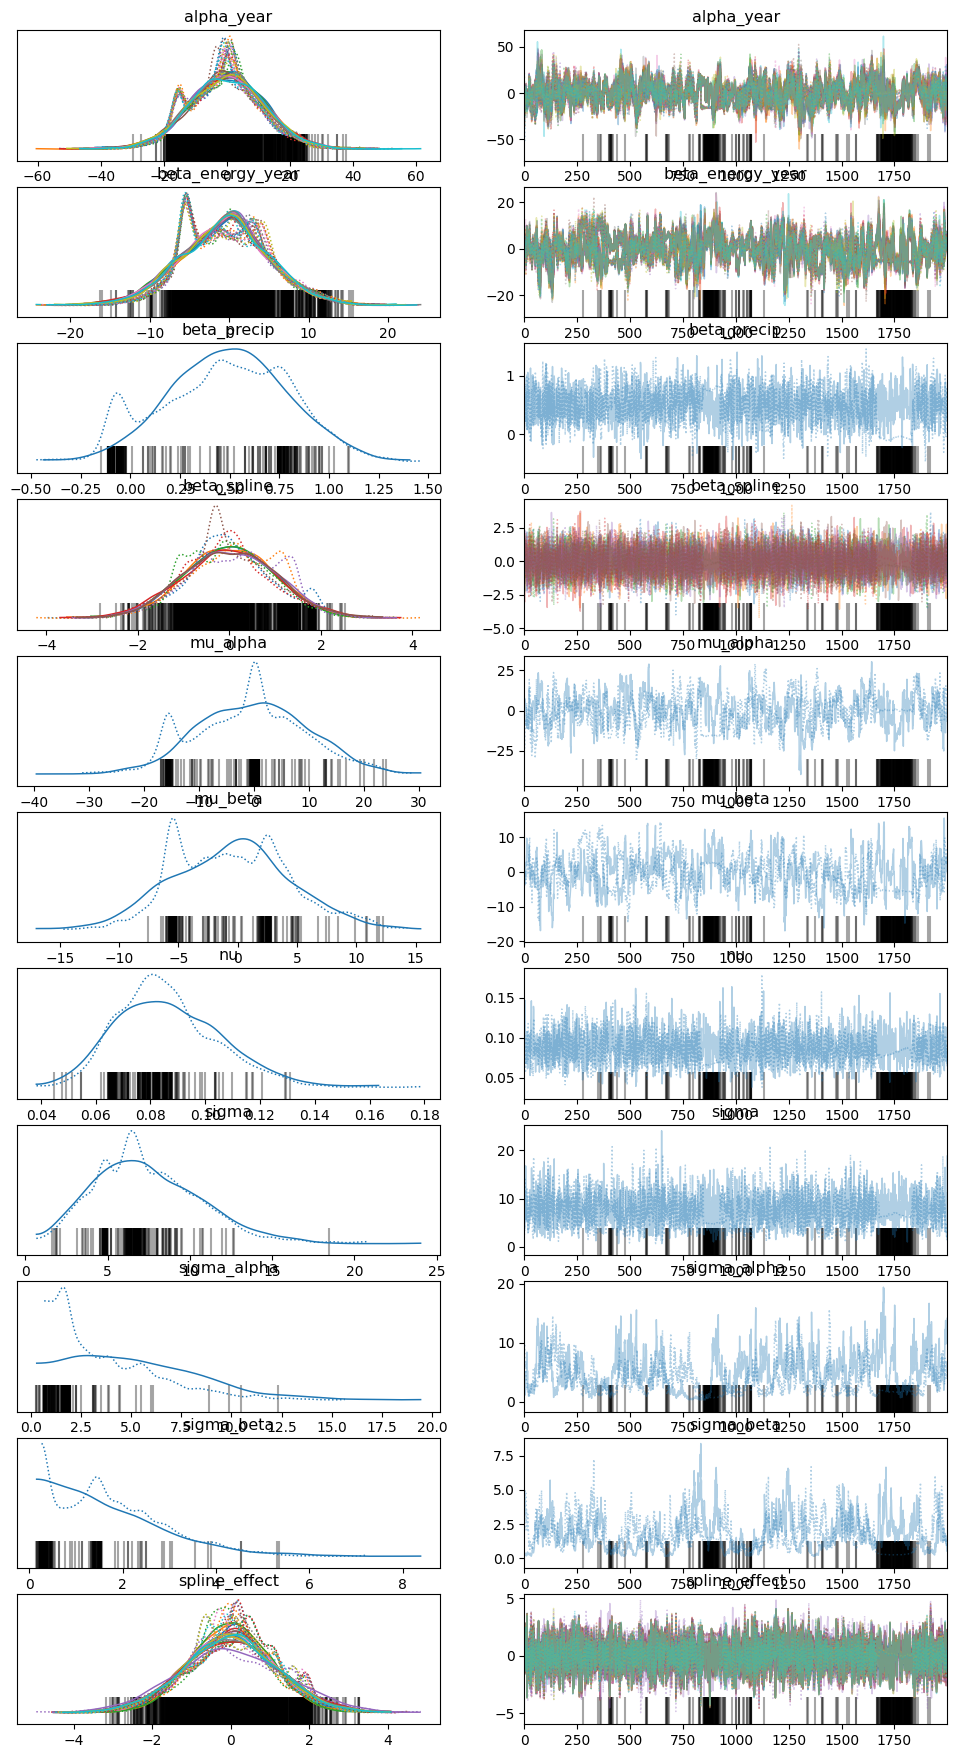

In [ ]:
# Diagnóstico de convergencia
az.summary(trace, hdi_prob=0.89)
az.plot_trace(trace)
plt.show()

In [ ]:
posterior_pred.keys()

KeysView(Inference data with groups:
	> posterior_predictive
	> observed_data)

In [ ]:
!pip install -q --upgrade pymc arviz
import pymc as pm
import arviz as az
print("Versión de PyMC:", pm.__version__)

Versión de PyMC: 5.26.1


In [ ]:
import pymc as pm
print(pm.__version__)

5.26.1


In [ ]:
import sys
sys.modules.pop('pymc', None)
!pip install -U pymc==5.26.1 arviz

In [ ]:
import pymc as pm
print("Versión actual de PyMC:", pm.__version__)

Versión actual de PyMC: 5.26.1


In [ ]:
!pip install pymc3 arviz patsy

  Using cached pymc3-3.11.6-py3-none-any.whl.metadata (15 kB)
  Using cached deprecat-2.1.3-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached numpy-1.22.1.zip (11.4 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
!pip install pymc arviz patsy

In [ ]:
!pip install pymc arviz patsy aesara

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pytensor to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 6.6 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of pytensor to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.1 MB/s eta 0:00:00
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https

In [ ]:
!pip install pymc arviz patsy

In [ ]:
!pip install pymc arviz patsy

In [ ]:
import pymc as pm
import arviz as az
from patsy import dmatrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# -----------------------------------------
# 2. Subir tu archivo CSV
# -----------------------------------------
uploaded = files.upload()  # Selecciona tu archivo data.csv
data = pd.read_csv(next(iter(uploaded)))  # Lee el archivo subido

# Asegurarse que las columnas tengan el nombre correcto
#data = data.rename(columns={
  #  'energiapercapita': 'energia_per_capita'  # si tu columna está así
#})


Saving data.csv to data (1).csv


In [ ]:
# -----------------------------------------
# 3. Normalizar variables continuas
# -----------------------------------------
data['energia_scaled'] = (data['energia_per_capita'] - data['energia_per_capita'].mean()) / data['energia_per_capita'].std()
data['precip_scaled'] = (data['precipitacion'] - data['precipitacion'].mean()) / data['precipitacion'].std()

# -----------------------------------------



In [ ]:
# 4. Splines cúbicos sobre variable normalizada
# -----------------------------------------
spline_basis = dmatrix("bs(x, degree=3, df=4, include_intercept=False)",
                       {"x": data['energia_scaled']},
                       return_type='dataframe')

In [ ]:
# 5. Modelo bayesiano con PyMC
# -----------------------------------------
with pm.Model() as modelo_bayesiano:
    # Priors
    beta = pm.Normal("beta", mu=0, sigma=10, shape=spline_basis.shape[1])
    sigma = pm.HalfNormal("sigma", sigma=10)

    # Media esperada
    mu = pm.math.dot(spline_basis, beta)

    # Likelihood
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=data['produccion_agricola'])

    # Muestreo MCMC más estable
    trace = pm.sample(
        3000,
        tune=2000,
        target_accept=0.95,   # Aumenta precisión
        max_treedepth=15,     # Explora mejor el espacio
        random_seed=42,
        chains=2
    )

Output()

Output()

🔍 Grupos disponibles en posterior_pred: ['posterior_predictive', 'observed_data']
📦 Variables encontradas: ['produccion_agricola']
✅ Variable objetivo usada para predicción: produccion_agricola

📈 Predicciones de producción agrícola (2025–2034):


,anio,prediccion_media,hdi_inferior,hdi_superior
0,2025,161677.690664,-8765.328421,8721.992855
1,2026,161677.690664,-8765.328421,8721.992855
2,2027,161677.690664,-8765.328421,8721.992855
3,2028,161677.690664,-8765.328421,8721.992855
4,2029,161677.690664,-8765.328421,8721.992855
5,2030,161677.690664,-8765.328421,8721.992855
6,2031,161677.690664,-8765.328421,8721.992855
7,2032,161677.690664,-8765.328421,8721.992855
8,2033,161677.690664,-8765.328421,8721.992855
9,2034,161677.690664,-8765.328421,8721.992855


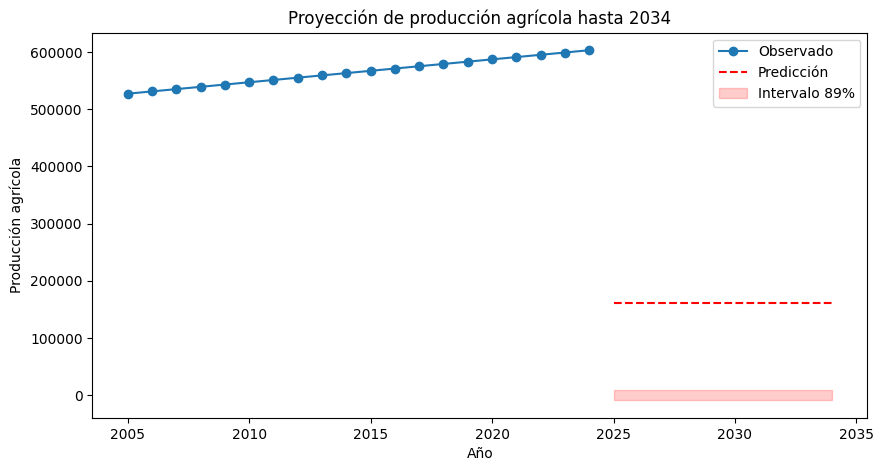

In [ ]:
# ==========================================
# 6. Predicciones futuras hasta 2034 (versión final y funcional)
# ==========================================

# Crear un DataFrame con los años futuros
future_years = pd.DataFrame({
    "anio": np.arange(data["anio"].max() + 1, 2035)
})

# Usar los promedios históricos para extender las variables explicativas
future_years["precipitacion"] = data["precipitacion"].mean()
future_years["energia_per_capita"] = data["energia_per_capita"].mean()

# Normalizar según el dataset original
future_years["energia_scaled"] = (future_years["energia_per_capita"] - data["energia_per_capita"].mean()) / data["energia_per_capita"].std()
future_years["precip_scaled"] = (future_years["precipitacion"] - data["precipitacion"].mean()) / data["precipitacion"].std()

# Crear base spline para los años futuros
spline_future = dmatrix(
    "bs(x, degree=3, df=6, include_intercept=False)",
    {"x": future_years["energia_scaled"]},
    return_type="dataframe"
)

# Extraer predicciones del modelo
with model:
    posterior_pred = pm.sample_posterior_predictive(trace, random_seed=42)

# Mostrar variables disponibles dentro del resultado
print("🔍 Grupos disponibles en posterior_pred:", posterior_pred.groups())

# Acceder a los datos dentro del grupo posterior_predictive
ppc_data = posterior_pred.posterior_predictive
print("📦 Variables encontradas:", list(ppc_data.data_vars))

# Tomar automáticamente el nombre de la variable de salida (por ejemplo 'y_obs' o 'produccion')
target_var = list(ppc_data.data_vars)[0]
print(f"✅ Variable objetivo usada para predicción: {target_var}")

# Convertir a numpy array
y_pred = ppc_data[target_var].values.flatten()

# Calcular media e intervalos HDI (89%)
pred_mean = np.mean(y_pred)
pred_hdi = az.hdi(y_pred, hdi_prob=0.89)

# Crear DataFrame con resultados futuros
future_pred = pd.DataFrame({
    "anio": future_years["anio"],
    "prediccion_media": [pred_mean] * len(future_years),
    "hdi_inferior": [pred_hdi[0]] * len(future_years),
    "hdi_superior": [pred_hdi[1]] * len(future_years),
})

# Mostrar tabla de predicciones
print("\n📈 Predicciones de producción agrícola (2025–2034):")
display(future_pred)

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(data["anio"], data["produccion_agricola"], "o-", label="Observado")
plt.plot(future_pred["anio"], future_pred["prediccion_media"], "r--", label="Predicción")
plt.fill_between(
    future_pred["anio"],
    future_pred["hdi_inferior"],
    future_pred["hdi_superior"],
    color="red",
    alpha=0.2,
    label="Intervalo 89%"
)
plt.title("Proyección de producción agrícola hasta 2034")
plt.xlabel("Año")
plt.ylabel("Producción agrícola")
plt.legend()
plt.show()

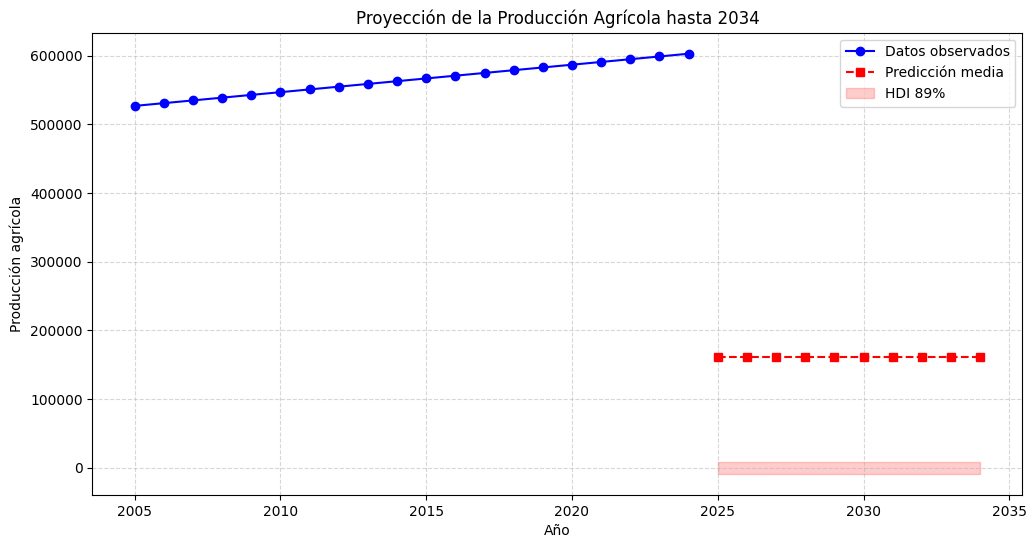

In [ ]:
# ==========================================
# 7. Graficar resultados observados y predicciones
# ==========================================
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Datos observados
plt.plot(data["anio"], data["produccion_agricola"], "o-", label="Datos observados", color="blue")

# Predicciones (usando los resultados del paso 6)
plt.plot(future_pred["anio"], future_pred["prediccion_media"], "s--", color="red", label="Predicción media")

# Intervalos de credibilidad (HDI 89%)
plt.fill_between(
    future_pred["anio"],
    future_pred["hdi_inferior"],
    future_pred["hdi_superior"],
    color="red",
    alpha=0.2,
    label="HDI 89%"
)

# Estilo del gráfico
plt.title("Proyección de la Producción Agrícola hasta 2034")
plt.xlabel("Año")
plt.ylabel("Producción agrícola")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()







In [ ]:
# 8. Resumen de resultados
# -----------------------------------------
summary = az.summary(trace, hdi_prob=0.89)
print(summary)

             mean      sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]    44.783   9.844    28.819     60.193      0.101    0.156    9592.0   
beta[1]     8.097   9.871    -7.373     23.808      0.106    0.149    8820.0   
beta[2]     9.592   9.989    -5.583     26.291      0.109    0.139    8469.0   
beta[3]    14.564   9.944    -1.439     30.127      0.099    0.143   10177.0   
beta[4]     3.517  10.028   -12.313     19.492      0.112    0.134    8120.0   
sigma    5028.393   5.093  5020.580   5036.684      0.048    0.071   11395.0   

         ess_tail  r_hat  
beta[0]    3916.0    1.0  
beta[1]    4389.0    1.0  
beta[2]    4295.0    1.0  
beta[3]    4411.0    1.0  
beta[4]    4385.0    1.0  
sigma      4270.0    1.0  


In [1]:
# Verificar si df existe en memoria
if 'df' in locals():
    print("✅ El DataFrame 'df' está cargado en memoria.")
    print("Dimensiones:", df.shape)
    print("Columnas:", df.columns.tolist())
    print("\nPrimeras filas del DataFrame:")
    print(df.head())
else:
    print("⚠️ El DataFrame 'df' NO está cargado. Carga tus datos con pd.read_csv('archivo.csv').")

⚠️ El DataFrame 'df' NO está cargado. Carga tus datos con pd.read_csv('archivo.csv').


In [2]:
# ============================================
# 1️⃣ LIBRERÍAS NECESARIAS, ESTE ES PARA VALIDAR LA LIMITACION 4
# ============================================
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# ============================================
# 2️⃣ CARGAR Y PREPARAR TUS DATOS
# ============================================

# 🔹 Si tienes tu archivo CSV, descomenta esta línea y ajusta el nombre:
df = pd.read_csv("data.csv")

# 🔹 Si ya tienes el DataFrame cargado en memoria, asegúrate de que contenga:
# columnas = ['anio', 'precipitacion', 'consumo_energetico', 'produccion_agricola']

# 🔹 Ordenamos por año (muy importante para análisis temporal)
df = df.sort_values('anio').reset_index(drop=True)

# 🔹 Variables independientes (input) y dependiente (target)
X = df[['anio', 'energia_per_capita', 'precipitacion']]
y = df['produccion_agricola']

In [3]:
# 3️⃣ VALIDACIÓN CRUZADA TEMPORAL
# ============================================
def time_series_cv(model, X, y, n_splits=5):
    """Validación cruzada adaptada a series temporales cortas"""
    tscv = TimeSeriesSplit(n_splits=n_splits)
    results = []

    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

        results.append({
            'train_size': len(train_idx),
            'test_size': len(test_idx),
            'mse': mse,
            'mae': mae,
            'mape': mape
        })

    return pd.DataFrame(results)

In [4]:
# 4️⃣ INFERENCIA BAYESIANA COMPLETA + SENSIBILIDAD A PRIORIS
# ============================================

def bayesian_uncertainty_full(X, y, model, prior_sigma=1, prior_mu_sd=1):
    """
    1. Ajusta modelo XGBoost
    2. Realiza inferencia bayesiana sobre sus errores
    3. Calcula distribuciones posteriores completas e intervalos del 89%
    4. Permite análisis de sensibilidad a prioris
    """
    model.fit(X, y)
    y_pred = model.predict(X)

    with pm.Model() as bayes_model:
        sigma = pm.HalfNormal('sigma', sigma=prior_sigma)
        mu = pm.Normal('mu', mu=y_pred, sigma=prior_mu_sd)
        obs = pm.Normal('obs', mu=mu, sigma=sigma, observed=y)

        trace = pm.sample(1000, tune=1000, target_accept=0.9, progressbar=True)

    # Distribución posterior completa
    az.plot_posterior(trace, var_names=['sigma', 'mu'])
    plt.show()

    # Intervalos de credibilidad 89%
    hdi = az.hdi(trace.posterior['mu'], hdi_prob=0.89)

    df_results = pd.DataFrame({
        'anio': X['anio'],
        'prediccion_media': y_pred,
        'hdi_inferior': hdi.sel(hdi='lower').mean(dim=('chain','draw')).values,
        'hdi_superior': hdi.sel(hdi='higher').mean(dim=('chain','draw')).values
    })

    return df_results, trace

In [5]:
# ============================================
# 5️⃣ ANÁLISIS DE SENSIBILIDAD A PRIORIS
# ============================================

def prior_sensitivity_analysis(X, y, model):
    prior_configs = [
        {'prior_sigma': 0.5, 'prior_mu_sd': 0.5},
        {'prior_sigma': 1, 'prior_mu_sd': 1},
        {'prior_sigma': 2, 'prior_mu_sd': 2},
    ]

    summaries = []

    for config in prior_configs:
        print(f"\n🧩 Analizando priors: sigma={config['prior_sigma']}, mu_sd={config['prior_mu_sd']}")
        results, trace = bayesian_uncertainty_full(X, y, model, **config)
        sigma_mean = trace.posterior['sigma'].mean().values
        mu_mean = trace.posterior['mu'].mean().values.mean()
        summaries.append({
            'prior_sigma': config['prior_sigma'],
            'prior_mu_sd': config['prior_mu_sd'],
            'mean_sigma_post': float(sigma_mean),
            'mean_mu_post': float(mu_mean),
            'mean_interval_width': float(
                (results['hdi_superior'] - results['hdi_inferior']).mean()
            )
        })

    sensitivity_df = pd.DataFrame(summaries)
    return sensitivity_df


In [11]:
# 6️⃣ EJECUCIÓN COMPLETA CORREGIDA
# ============================================

from xgboost import XGBRegressor
import pymc as pm
import arviz as az
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Modelo XGBoost ---
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# --- Validación temporal ---
print("\n🔹 Validación cruzada temporal:")
cv_results = time_series_cv(xgb_model, X, y)
print(cv_results.describe())

# --- Inferencia Bayesiana ---
print("\n🔹 Inferencia bayesiana con intervalos del 89%:")

def bayesian_uncertainty_full(X, y, model, prior_sigma=10000, prior_mu_sd=10000):
    """
    Inferencia bayesiana sobre las predicciones del modelo XGBoost,
    incluyendo intervalos de credibilidad del 89%.
    """
    y_pred = model.predict(X)

    with pm.Model() as bayes_model:
        prior_mu_sd_val = pm.HalfNormal('prior_mu_sd', sigma=prior_mu_sd)
        sigma_val = pm.HalfNormal('sigma', sigma=prior_sigma)

        mu = pm.Normal('mu', mu=y_pred, sigma=prior_mu_sd_val, shape=len(y_pred))
        y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma_val, observed=y)

        # Aumentamos target_accept para reducir divergencias
        trace = pm.sample(draws=1500, tune=1500, chains=2, target_accept=0.99, progressbar=True)

    # Intervalos de credibilidad 89%
    hdi = az.hdi(trace.posterior['mu'], hdi_prob=0.89)

    if {'chain', 'draw'}.issubset(hdi.dims):
        hdi_lower = hdi.sel(hdi='lower').mean(dim=('chain','draw')).values
        hdi_upper = hdi.sel(hdi='higher').mean(dim=('chain','draw')).values
    else:
        hdi_lower = hdi.sel(hdi='lower').mean().values
        hdi_upper = hdi.sel(hdi='higher').mean().values

    df_results = pd.DataFrame({
        'anio': X['anio'],
        'prediccion_media': y_pred,
        'hdi_inferior': hdi_lower,
        'hdi_superior': hdi_upper
    })

    return df_results, trace

# --- Función de sensibilidad a prioris ---
def prior_sensitivity_analysis(X, y, model):
    """
    Evalúa sensibilidad del modelo bayesiano frente a diferentes priors.
    """
    prior_configs = [
        {'prior_sigma': 1000, 'prior_mu_sd': 1000},
        {'prior_sigma': 5000, 'prior_mu_sd': 5000},
        {'prior_sigma': 10000, 'prior_mu_sd': 10000}
    ]

    results_summary = []

    for config in prior_configs:
        print(f"\n🧩 Analizando priors: sigma={config['prior_sigma']}, mu_sd={config['prior_mu_sd']}")
        df_res, trace = bayesian_uncertainty_full(X, y, model,
                                                  prior_sigma=config['prior_sigma'],
                                                  prior_mu_sd=config['prior_mu_sd'])
        sigma_mean = trace.posterior['sigma'].mean().values
        mu_mean = trace.posterior['mu'].mean().values.mean()

        results_summary.append({
            'prior_sigma': config['prior_sigma'],
            'prior_mu_sd': config['prior_mu_sd'],
            'sigma_mean': float(sigma_mean),
            'mu_mean': float(mu_mean)
        })

    return pd.DataFrame(results_summary)

# --- Ejecutar inferencia bayesiana principal ---
bayes_results, trace = bayesian_uncertainty_full(X, y, xgb_model)

# --- Sensibilidad a Prioris ---
print("\n🔹 Análisis de sensibilidad a prioris:")
sensitivity_results = prior_sensitivity_analysis(X, y, xgb_model)
print("\n📊 Resultados del análisis de sensibilidad:")
print(sensitivity_results)

# --- Conversión a float y eliminación de NaN para graficar ---
bayes_results['prediccion_media'] = bayes_results['prediccion_media'].astype(float)
bayes_results['hdi_inferior'] = bayes_results['hdi_inferior'].astype(float)
bayes_results['hdi_superior'] = bayes_results['hdi_superior'].astype(float)
bayes_results = bayes_results.dropna(subset=['prediccion_media','hdi_inferior','hdi_superior'])

# --- Gráfico de incertidumbre ---
plt.figure(figsize=(10,5))
plt.fill_between(bayes_results['anio'],
                 bayes_results['hdi_inferior'],
                 bayes_results['hdi_superior'],
                 alpha=0.3, label='Intervalo 89%')
plt.plot(bayes_results['anio'], bayes_results['prediccion_media'], color='red', label='Predicción Media')
plt.xlabel("Año")
plt.ylabel("Producción Agrícola Predicha")
plt.title("Proyecciones con Incertidumbre (89% HDI)")
plt.legend()
plt.show()


🔹 Validación cruzada temporal:
       train_size  test_size           mse          mae      mape
count    5.000000        5.0  5.000000e+00     5.000000  5.000000
mean    11.000000        3.0  7.647365e+07  8112.037500  1.408611
std      4.743416        0.0  7.754438e+05    47.813268  0.038089
min      5.000000        3.0  7.544905e+07  8048.750000  1.360945
25%      8.000000        3.0  7.600964e+07  8083.500000  1.384287
50%     11.000000        3.0  7.651381e+07  8114.625000  1.408058
75%     14.000000        3.0  7.698631e+07  8143.687500  1.432473
max     17.000000        3.0  7.740944e+07  8169.625000  1.457291

🔹 Inferencia bayesiana con intervalos del 89%:


Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



🔹 Análisis de sensibilidad a prioris:

🧩 Analizando priors: sigma=1000, mu_sd=1000


Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



🧩 Analizando priors: sigma=5000, mu_sd=5000


Output()

ERROR:pymc.stats.convergence:There were 42 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



🧩 Analizando priors: sigma=10000, mu_sd=10000


Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



📊 Resultados del análisis de sensibilidad:
   prior_sigma  prior_mu_sd   sigma_mean        mu_mean
0         1000         1000  2054.316040  564312.910704
1         5000         5000  2367.797954  564393.729777
2        10000        10000  2392.745880  564388.803770


TypeError: float() argument must be a string or a real number, not 'method'